# Keywords Analysis

## Task Setting and Description

**Objective**: Extract and analyze keywords from the list of publications using Python and public APIs.

**Tools**: 
- Python
- DOI lookup APIs (e.g., CrossRef API)
- Natural Language Processing libraries (e.g., NLTK, spaCy)
- Pandas for data handling
- Visualization libraries (e.g., matplotlib, seaborn, wordcloud, networkx)

---

## Code Implementation

### 1. Data Retrieval

**Import Necessary Libraries**



In [3]:
!pip install pandas

  Using cached pandas-2.2.3-cp311-cp311-macosx_11_0_arm64.whl.metadata (89 kB)
  Using cached pytz-2024.2-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2024.2-py2.py3-none-any.whl.metadata (1.4 kB)
Using cached pandas-2.2.3-cp311-cp311-macosx_11_0_arm64.whl (11.3 MB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.4/5.4 MB 28.6 MB/s eta 0:00:00a 0:00:01
Using cached pytz-2024.2-py2.py3-none-any.whl (508 kB)
Using cached tzdata-2024.2-py2.py3-none-any.whl (346 kB)


In [4]:
!pip install requests

  Using cached requests-2.32.3-py3-none-any.whl.metadata (4.6 kB)
  Using cached charset_normalizer-3.4.0-cp311-cp311-macosx_11_0_arm64.whl.metadata (34 kB)
  Using cached idna-3.10-py3-none-any.whl.metadata (10 kB)
  Using cached urllib3-2.2.3-py3-none-any.whl.metadata (6.5 kB)
  Using cached certifi-2024.8.30-py3-none-any.whl.metadata (2.2 kB)
Using cached requests-2.32.3-py3-none-any.whl (64 kB)
Using cached certifi-2024.8.30-py3-none-any.whl (167 kB)
Using cached charset_normalizer-3.4.0-cp311-cp311-macosx_11_0_arm64.whl (118 kB)
Using cached idna-3.10-py3-none-any.whl (70 kB)
Using cached urllib3-2.2.3-py3-none-any.whl (126 kB)


In [1]:
import pandas as pd
import requests



**Load DOIs from CSV Files**



In [6]:
# Load DOIs from CSV files in data/references folder
import pandas as pd

# List of file paths
file_paths = [
    '/Users/max/Documents/Code/tsi-sota-ai/data/references/1.2.2.1 LR - The Specialist Shortage and its Impact.csv',
    '/Users/max/Documents/Code/tsi-sota-ai/data/references/1.2.2.2 LR - AI Applications in SCM Decision Support.csv',
    '/Users/max/Documents/Code/tsi-sota-ai/data/references/1.2.2.3 LR - Human-AI Collaboration in SCM.csv',
    '/Users/max/Documents/Code/tsi-sota-ai/data/references/1.2.2.4 LR - Challenges and Limitations of LLMs in SCM.csv',
    '/Users/max/Documents/Code/tsi-sota-ai/data/references/1.2.2.5 LR - Decision-Making Processes.csv',
    '/Users/max/Documents/Code/tsi-sota-ai/data/references/1.2.2.6 LR - Agents.csv'
]

# Initialize an empty list to store DataFrames
dfs = []

# Loop through file paths, read each CSV, and add a column with the source file name
for file_path in file_paths:
    df = pd.read_csv(file_path)
    df['source_file'] = file_path.split('/')[-1]  # Extract the file name from the path
    dfs.append(df)

# Concatenate all DataFrames into a single DataFrame
references_df = pd.concat(dfs, ignore_index=True)

# Display the first few rows of the combined DataFrame
references_df.head()

,date,title,doi,authors,journal,short_journal,volume,year,publisher,issue,page,abstract,source_file
0,2023-09-13,Transformative Procurement Trends: Integrating...,10.3390/logistics7030063,"[{'author_name': 'Areej Althabatah', 'author_s...",Logistics,Logistics,7.0,2023,MDPI AG,3.0,63,Background: the advent of Industry 4.0 (I4.0) ...,1.2.2.1 LR - The Specialist Shortage and its I...
1,2021-10-07,Exploring Progress with Supply Chain Risk Mana...,10.3390/logistics5040070,"[{'author_name': 'Remko van Hoek', 'author_slu...",Logistics,Logistics,5.0,2021,MDPI AG,4.0,70,Background: In response to calls for actionabl...,1.2.2.1 LR - The Specialist Shortage and its I...
2,2023-12-01,Exploring Applications and Practical Examples ...,10.3390/logistics7040091,"[{'author_name': 'João Reis', 'author_slug': '...",Logistics,Logistics,7.0,2023,MDPI AG,4.0,91,Background: Material Requirements Planning (MR...,1.2.2.1 LR - The Specialist Shortage and its I...
3,2021-09-27,Sustainable Innovations in the Food Industry t...,10.3390/logistics5040066,"[{'author_name': 'Saurabh Sharma', 'author_slu...",Logistics,Logistics,5.0,2021,MDPI AG,4.0,66,The agri-food sector is an endless source of e...,1.2.2.1 LR - The Specialist Shortage and its I...
4,2021-04-01,Artificial Intelligence (AI): Multidisciplinar...,10.1016/j.ijinfomgt.2019.08.002,"[{'author_name': 'Yogesh K. Dwivedi', 'author_...",International Journal of Information Management,International Journal of Information Management,57.0,2021,Elsevier BV,NaN,101994,"As far back as the industrial revolution, sign...",1.2.2.1 LR - The Specialist Shortage and its I...


In [7]:
references_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 593 entries, 0 to 592
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           593 non-null    object 
 1   title          593 non-null    object 
 2   doi            593 non-null    object 
 3   authors        593 non-null    object 
 4   journal        593 non-null    object 
 5   short_journal  563 non-null    object 
 6   volume         589 non-null    float64
 7   year           593 non-null    int64  
 8   publisher      593 non-null    object 
 9   issue          403 non-null    float64
 10  page           415 non-null    object 
 11  abstract       587 non-null    object 
 12  source_file    593 non-null    object 
dtypes: float64(2), int64(1), object(10)
memory usage: 60.4+ KB


In [8]:
# Export the combined DataFrame to a JSON file
references_df.to_json('/Users/max/Documents/Code/tsi-sota-ai/data/references_raw.json', orient='records', lines=True)



**Fetch Publication Metadata Using CrossRef API**



In [9]:
!pip install crossrefapi

  Attempting uninstall: urllib3
    Found existing installation: urllib3 2.2.3
    Uninstalling urllib3-2.2.3:
      Successfully uninstalled urllib3-2.2.3


In [3]:
from crossref.restful import Works

# Initialize the Works client
works = Works()

In [4]:
# Define a function to fetch metadata for a given DOI
def fetch_metadata(doi):
    try:
        # Fetch metadata for the given DOI
        metadata = works.doi(doi)
        return {
            'DOI': metadata.get('DOI'),
            'title': metadata.get('title', [None])[0],
            'authors': [author.get('given', '') + ' ' + author.get('family', '') for author in metadata.get('author', [])],
            'abstract': metadata.get('abstract'),
            'keywords': metadata.get('subject', [])
        }
    except Exception as e:
        print(f"Error fetching metadata for DOI {doi}: {e}")
        return None

In [12]:
# Example usage
doi = '10.1590/0102-311x00133115'
metadata = fetch_metadata(doi)
print(metadata)

{'DOI': '10.1590/0102-311x00133115', 'title': 'Congenital Zika virus syndrome', 'authors': ['Viroj Wiwanitki'], 'abstract': None, 'keywords': []}


In [5]:
# Loop through DOIs and collect metadata
!pip install tqdm
from tqdm import tqdm
import time

In [18]:
# Initialize the list to store metadata
metadata_list = []

# Iterate through each DOI in the references DataFrame with a 1-second delay
for doi in tqdm(references_df['doi'], desc='Fetching metadata'):
    metadata = fetch_metadata(doi)
    if metadata:
        metadata_list.append(metadata)
    time.sleep(1)  # Add a 1-second delay between requests

Fetching metadata: 100%|██████████| 593/593 [14:36<00:00,  1.48s/it]


In [19]:
# Create a DataFrame from the metadata list
references_metadata_crossref_df = pd.DataFrame(metadata_list)

# Display the first few rows of the metadata DataFrame
references_metadata_crossref_df.head()

,DOI,title,authors,abstract,keywords
0,10.3390/logistics7030063,Transformative Procurement Trends: Integrating...,"[Areej Althabatah, Mohammed Yaqot, Brenno Mene...",<jats:p>Background: the advent of Industry 4.0...,[]
1,10.3390/logistics5040070,Exploring Progress with Supply Chain Risk Mana...,[Remko van Hoek],<jats:p>Background: In response to calls for a...,[]
2,10.3390/logistics7040091,Exploring Applications and Practical Examples ...,[João Reis],<jats:p>Background: Material Requirements Plan...,[]
3,10.3390/logistics5040066,Sustainable Innovations in the Food Industry t...,"[Saurabh Sharma, Vijay Kumar Gahlawat, Kumar R...",<jats:p>The agri-food sector is an endless sou...,[]
4,10.1016/j.ijinfomgt.2019.08.002,Artificial Intelligence (AI): Multidisciplinar...,"[Yogesh K. Dwivedi, Laurie Hughes, Elvira Isma...",None,[]


In [20]:
references_metadata_crossref_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 593 entries, 0 to 592
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   DOI       593 non-null    object
 1   title     593 non-null    object
 2   authors   593 non-null    object
 3   abstract  538 non-null    object
 4   keywords  593 non-null    object
dtypes: object(5)
memory usage: 23.3+ KB


As we can see, Crossref requests returned us empty lists for keywords, so let's try alternative approaches


**Fetch Publication Metadata Using Semantic Scholar API**

In [6]:
import requests
import time

# Function to fetch metadata using Semantic Scholar API with enhanced error handling and rate limiting
def fetch_semantic_scholar_metadata(doi, max_retries=3, backoff_factor=2):
    """
    Fetch metadata for a given DOI using the Semantic Scholar API.

    Args:
        doi (str): The DOI of the publication.
        max_retries (int): Maximum number of retries for failed requests.
        backoff_factor (int): Factor by which the wait time increases after each retry.

    Returns:
        dict or None: A dictionary containing metadata if successful, else None.
    """
    url = f'https://api.semanticscholar.org/graph/v1/paper/DOI:{doi}'
    params = {
        'fields': 'title,authors,abstract,fieldsOfStudy'
    }
    headers = {
        'User-Agent': 'YourProjectName/1.0 (your.email@example.com)'
    }
    
    for attempt in range(1, max_retries + 1):
        try:
            response = requests.get(url, params=params, headers=headers)
            
            if response.status_code == 200:
                data = response.json()
                return {
                    'DOI': doi,
                    'title': data.get('title'),
                    'authors': [author['name'] for author in data.get('authors', [])],
                    'abstract': data.get('abstract'),
                    'keywords': data.get('fieldsOfStudy', [])
                }
            elif response.status_code == 429:
                # Rate limit exceeded
                wait_time = backoff_factor ** attempt
                print(f"Rate limit exceeded. Retrying in {wait_time} seconds...")
                time.sleep(wait_time)
            else:
                print(f"Failed to fetch data for DOI {doi}. Status code: {response.status_code}")
                return None
        except requests.exceptions.RequestException as e:
            wait_time = backoff_factor ** attempt
            print(f"Error fetching data for DOI {doi}: {e}. Retrying in {wait_time} seconds...")
            time.sleep(wait_time)
    
    print(f"Failed to fetch data for DOI {doi} after {max_retries} attempts.")
    return None



In [23]:
# Example usage
doi = '10.1038/s41586-020-2649-2'
metadata = fetch_semantic_scholar_metadata(doi)
print(metadata)

{'DOI': '10.1038/s41586-020-2649-2', 'title': 'Array programming with NumPy', 'authors': ['Charles R. Harris', 'K. Millman', 'S. Walt', 'R. Gommers', 'Pauli Virtanen', 'D. Cournapeau', 'Eric Wieser', 'Julian Taylor', 'Sebastian Berg', 'Nathaniel J. Smith', 'Robert Kern', 'Matti Picus', 'Stephan Hoyer', 'M. Kerkwijk', 'M. Brett', 'A. Haldane', "Jaime Fern'andez del R'io", 'Marcy Wiebe', 'Pearu Peterson', "Pierre G'erard-Marchant", 'Kevin Sheppard', 'Tyler Reddy', 'Warren Weckesser', 'Hameer Abbasi', 'C. Gohlke', 'T. Oliphant'], 'abstract': None, 'keywords': ['Computer Science', 'Mathematics', 'Medicine']}


In [24]:
import pandas as pd
from tqdm import tqdm
import time

# Initialize the list to store metadata
metadata_list = []

# Iterate through each DOI in the references DataFrame with a 1-second delay
for doi in tqdm(references_df['doi'], desc='Fetching metadata'):
    metadata = fetch_semantic_scholar_metadata(doi)
    if metadata:
        metadata_list.append(metadata)
    time.sleep(1)  # Add a 1-second delay between requests to respect API rate limits

# Create a DataFrame from the metadata list
references_metadata_semanticscholar_df = pd.DataFrame(metadata_list)

# Export the metadata DataFrame to a JSON file
references_metadata_semanticscholar_df.to_json(
    '/Users/max/Documents/Code/tsi-sota-ai/data/references_metadata_semanticscholar.json',
    orient='records',
    lines=True
)

# Display the first few rows of the metadata DataFrame
references_metadata_semanticscholar_df.head()

Fetching metadata:   4%|▍         | 23/593 [00:35<14:59,  1.58s/it]

Failed to fetch data for DOI 10.1287/mnsc.2019.3499. Status code: 404


Fetching metadata:   9%|▊         | 51/593 [01:18<13:08,  1.45s/it]

Failed to fetch data for DOI 10.1287/mnsc.2019.3511. Status code: 404


Fetching metadata:  13%|█▎        | 75/593 [01:55<12:51,  1.49s/it]

Failed to fetch data for DOI 10.1287/mnsc.2023.4739. Status code: 404


Fetching metadata:  23%|██▎       | 134/593 [03:25<11:53,  1.56s/it]

Failed to fetch data for DOI 10.3390/smartcities6060142. Status code: 404


Fetching metadata:  25%|██▍       | 147/593 [03:45<11:21,  1.53s/it]

Failed to fetch data for DOI 10.3390/make5010017. Status code: 404


Fetching metadata:  25%|██▌       | 151/593 [03:51<11:23,  1.55s/it]

Failed to fetch data for DOI 10.3390/make5010017. Status code: 404


Fetching metadata:  30%|██▉       | 175/593 [04:30<10:46,  1.55s/it]


KeyboardInterrupt: 

We're getting 404 error, so let's wait for an API Key provisioning by Semantic Scholar. Meanwhile let's use third approach


---
### 2. Keywords Extraction


#### 2.1 Extract Keywords from Abstracts

Description: Use keyword extraction algorithms on available abstracts.3

In [28]:
!pip install nltk

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 15.2 MB/s eta 0:00:00


In [2]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from collections import Counter
from tqdm import tqdm

In [36]:
# Download necessary NLTK data files
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to /Users/max/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /Users/max/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /Users/max/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [7]:
# Function to extract keywords from text
def extract_keywords(text, num_keywords=10):
    """
    Extracts the top `num_keywords` keywords from the given text.

    Args:
        text (str): The text to extract keywords from.
        num_keywords (int): The number of top keywords to extract.

    Returns:
        list: A list of extracted keywords.
    """
    # Tokenize the text into words
    tokens = word_tokenize(text.lower())
    
    # Filter out non-alphabetic tokens
    tokens = [word for word in tokens if word.isalpha()]
    
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [word for word in tokens if word not in stop_words]
    
    # Count word frequencies
    word_counts = Counter(filtered_tokens)
    
    # Extract the most common keywords
    return [word for word, count in word_counts.most_common(num_keywords)]

In [38]:
# Apply the extract_keywords function to the 'abstract' column
tqdm.pandas(desc="Extracting keywords")
references_df['extracted_keywords'] = references_df['abstract'].progress_apply(
    lambda x: extract_keywords(x) if pd.notnull(x) else []
)

# Display the first few rows with the extracted keywords
references_df[['doi', 'title', 'extracted_keywords']].head()

Extracting keywords: 100%|██████████| 593/593 [00:00<00:00, 1528.21it/s]


,doi,title,extracted_keywords
0,10.3390/logistics7030063,Transformative Procurement Trends: Integrating...,"[technologies, procurement, supply, chain, man..."
1,10.3390/logistics5040070,Exploring Progress with Supply Chain Risk Mana...,"[pandemic, risks, risk, year, first, supply, m..."
2,10.3390/logistics7040091,Exploring Applications and Practical Examples ...,"[mrp, python, management, article, erp, system..."
3,10.3390/logistics5040066,Sustainable Innovations in the Food Industry t...,"[ai, artificial, big, data, food, intelligent,..."
4,10.1016/j.ijinfomgt.2019.08.002,Artificial Intelligence (AI): Multidisciplinar...,"[ai, significant, industrial, potential, new, ..."


#### 2.2 Data preprocessing with LLM

We got our extracted_keywords, but those are far from being perfect. So let's use LLM to correct the result

In [39]:
# Install necessary packages
!pip install google-generativeai python-dotenv tqdm

  Using cached google_generativeai-0.8.3-py3-none-any.whl.metadata (3.9 kB)
  Using cached python_dotenv-1.0.1-py3-none-any.whl.metadata (23 kB)
  Using cached google_ai_generativelanguage-0.6.10-py3-none-any.whl.metadata (5.6 kB)
  Using cached pydantic-2.9.2-py3-none-any.whl.metadata (149 kB)
  Using cached cachetools-5.5.0-py3-none-any.whl.metadata (5.3 kB)
  Using cached pyasn1_modules-0.4.1-py3-none-any.whl.metadata (3.5 kB)
  Using cached rsa-4.9-py3-none-any.whl.metadata (4.2 kB)
  Using cached httplib2-0.22.0-py3-none-any.whl.metadata (2.6 kB)
  Using cached google_auth_httplib2-0.2.0-py2.py3-none-any.whl.metadata (2.2 kB)
  Using cached uritemplate-4.1.1-py2.py3-none-any.whl.metadata (2.9 kB)
  Using cached annotated_types-0.7.0-py3-none-any.whl.metadata (15 kB)
  Using cached pydantic_core-2.23.4-cp311-cp311-macosx_11_0_arm64.whl.metadata (6.6 kB)
  Using cached pyasn1-0.6.1-py3-none-any.whl.metadata (8.4 kB)
Using cached google_generativeai-0.8.3-py3-none-any.whl (160 kB)
Us

In [8]:
# Import required libraries
import pandas as pd
import google.generativeai as genai
from dotenv import load_dotenv
import os
from tqdm import tqdm
import time

/Users/max/miniconda3/envs/tsi/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [9]:
# Load environment variables from .env file
load_dotenv()

True

In [10]:
# Configure the Gemini API with the API key from .env
genai.configure(api_key=os.getenv("GOOGLE_API_KEY"))

In [11]:
# Initialize the Gemini model
model = genai.GenerativeModel("gemini-1.5-flash")


In [12]:
# Function to revise keywords using Gemini API
def revise_keywords(title, abstract, extracted_keywords, max_retries=3, backoff_factor=2):
    """
    Revises extracted keywords by analyzing the title and abstract using Gemini API.

    Args:
        title (str): The title of the publication.
        abstract (str): The abstract of the publication.
        extracted_keywords (list): The initially extracted keywords.
        max_retries (int): Maximum number of retries for failed API requests.
        backoff_factor (int): Factor by which the wait time increases after each retry.

    Returns:
        list: A list of revised keywords.
    """
    prompt = (
        f"Given the following publication details, please provide a revised list of 6 relevant keywords.\n\n"
        f"Title: {title}\n"
        f"Abstract: {abstract}\n"
        f"Extracted Keywords: {', '.join(extracted_keywords)}\n\n"
        f"Revised Keywords:"
    )
    
    for attempt in range(1, max_retries + 1):
        try:
            response = model.generate_content(prompt)
            revised_keywords = response.text.strip().split(', ')
            # Ensure only unique keywords and limit to 6
            revised_keywords = list(dict.fromkeys(revised_keywords))[:6]
            return revised_keywords
        except Exception as e:
            wait_time = backoff_factor ** attempt
            print(f"Error revising keywords for DOI {doi}: {e}. Retrying in {wait_time} seconds...")
            time.sleep(wait_time)
    
    print(f"Failed to revise keywords for DOI {doi} after {max_retries} attempts.")
    return extracted_keywords  # Fallback to original keywords if revision fails

In [47]:
# Load your references DataFrame (assuming it's already loaded as references_df)
# If not, load it using pd.read_csv or other relevant methods
# references_df = pd.read_csv('path_to_your_references_df.csv')

# Initialize the new column for revised keywords
references_df['revised_keywords'] = None

In [48]:
references_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 593 entries, 0 to 592
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   date                593 non-null    object 
 1   title               593 non-null    object 
 2   doi                 593 non-null    object 
 3   authors             593 non-null    object 
 4   journal             593 non-null    object 
 5   short_journal       563 non-null    object 
 6   volume              589 non-null    float64
 7   year                593 non-null    int64  
 8   publisher           593 non-null    object 
 9   issue               403 non-null    float64
 10  page                415 non-null    object 
 11  abstract            587 non-null    object 
 12  source_file         593 non-null    object 
 13  extracted_keywords  593 non-null    object 
 14  revised_keywords    0 non-null      object 
dtypes: float64(2), int64(1), object(12)
memory usage: 69.6+ K

In [49]:
# Iterate through each row in the DataFrame and revise keywords
for index, row in tqdm(references_df.iterrows(), total=references_df.shape[0], desc="Revising keywords"):
    doi = row['doi']
    title = row['title']
    abstract = row['abstract'] if pd.notnull(row['abstract']) else ""
    extracted_keywords = row['extracted_keywords'] if isinstance(row['extracted_keywords'], list) else []
    
    revised = revise_keywords(title, abstract, extracted_keywords)
    references_df.at[index, 'revised_keywords'] = revised
    
    time.sleep(1)  # Add a 1-second delay to respect API rate limits

Revising keywords: 100%|██████████| 593/593 [1:03:42<00:00,  6.45s/it]


In [50]:
# Display the first few rows with the revised keywords
references_df[['doi', 'title', 'extracted_keywords', 'revised_keywords']].head()

,doi,title,extracted_keywords,revised_keywords
0,10.3390/logistics7030063,Transformative Procurement Trends: Integrating...,"[technologies, procurement, supply, chain, man...",[1. Industry 4.0\n2. Procurement 4.0\n3. Suppl...
1,10.3390/logistics5040070,Exploring Progress with Supply Chain Risk Mana...,"[pandemic, risks, risk, year, first, supply, m...",[1. Supply Chain Risk Management (SCRM)\n2. CO...
2,10.3390/logistics7040091,Exploring Applications and Practical Examples ...,"[mrp, python, management, article, erp, system...",[1. Material Requirements Planning (MRP)\n2. P...
3,10.3390/logistics5040066,Sustainable Innovations in the Food Industry t...,"[ai, artificial, big, data, food, intelligent,...",[1. AI in Food Industry\n2. Big Data Analytics...
4,10.1016/j.ijinfomgt.2019.08.002,Artificial Intelligence (AI): Multidisciplinar...,"[ai, significant, industrial, potential, new, ...","[Artificial Intelligence (AI), Technological ..."


In [ ]:
# Save the updated DataFrame to a new CSV or JSON file
# references_df.to_csv('path_to_save_revised_keywords.csv', index=False)
references_df.to_json('/Users/max/Documents/Code/tsi-sota-ai/dah geminita/references_with_keywords_gemini.json', orient='records', lines=True)

Let's read backed up file into new dataframe to continue our work after brake

In [13]:
import pandas as pd

# Read the JSON file into a DataFrame
references_keywords_df = pd.read_json('/Users/max/Documents/Code/tsi-sota-ai/data/references_with_keywords_gemini.json', orient='records', lines=True)

# Display the first few rows of the DataFrame
references_keywords_df.head()

,date,title,doi,authors,journal,short_journal,volume,year,publisher,issue,page,abstract,source_file,extracted_keywords,revised_keywords
0,2023-09-13,Transformative Procurement Trends: Integrating...,10.3390/logistics7030063,"[{'author_name': 'Areej Althabatah', 'author_s...",Logistics,Logistics,7.0,2023,MDPI AG,3.0,63,Background: the advent of Industry 4.0 (I4.0) ...,1.2.2.1 LR - The Specialist Shortage and its I...,"[technologies, procurement, supply, chain, man...",[1. Industry 4.0\n2. Procurement 4.0\n3. Suppl...
1,2021-10-07,Exploring Progress with Supply Chain Risk Mana...,10.3390/logistics5040070,"[{'author_name': 'Remko van Hoek', 'author_slu...",Logistics,Logistics,5.0,2021,MDPI AG,4.0,70,Background: In response to calls for actionabl...,1.2.2.1 LR - The Specialist Shortage and its I...,"[pandemic, risks, risk, year, first, supply, m...",[1. Supply Chain Risk Management (SCRM)\n2. CO...
2,2023-12-01,Exploring Applications and Practical Examples ...,10.3390/logistics7040091,"[{'author_name': 'João Reis', 'author_slug': '...",Logistics,Logistics,7.0,2023,MDPI AG,4.0,91,Background: Material Requirements Planning (MR...,1.2.2.1 LR - The Specialist Shortage and its I...,"[mrp, python, management, article, erp, system...",[1. Material Requirements Planning (MRP)\n2. P...
3,2021-09-27,Sustainable Innovations in the Food Industry t...,10.3390/logistics5040066,"[{'author_name': 'Saurabh Sharma', 'author_slu...",Logistics,Logistics,5.0,2021,MDPI AG,4.0,66,The agri-food sector is an endless source of e...,1.2.2.1 LR - The Specialist Shortage and its I...,"[ai, artificial, big, data, food, intelligent,...",[1. AI in Food Industry\n2. Big Data Analytics...
4,2021-04-01,Artificial Intelligence (AI): Multidisciplinar...,10.1016/j.ijinfomgt.2019.08.002,"[{'author_name': 'Yogesh K. Dwivedi', 'author_...",International Journal of Information Management,International Journal of Information Management,57.0,2021,Elsevier BV,NaN,101994,"As far back as the industrial revolution, sign...",1.2.2.1 LR - The Specialist Shortage and its I...,"[ai, significant, industrial, potential, new, ...","[Artificial Intelligence (AI), Technological ..."


Visual analysis has shown, that we got some noise with LLM answers, so for futher keywords analysis, we'll stick to the extracted_keywords column



---

### 3. Visualization

#### 3.1 Calculate and Visualize Keyword Frequencies


In [15]:
!pip install wordcloud

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 12.7 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 15.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 15.2 MB/s eta 0:00:00


In [16]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
from wordcloud import WordCloud

Matplotlib is building the font cache; this may take a moment.


Calculate the frequency of each keyword across all publications to identify the most common ones.

In [17]:
# Assuming references_keywords_df is already loaded
# Flatten the list of keywords
all_keywords = [keyword for keywords_list in references_keywords_df['extracted_keywords'] for keyword in keywords_list]

# Calculate keyword frequencies
keyword_counts = Counter(all_keywords)

# Create a DataFrame from the keyword counts
keyword_freq_df = pd.DataFrame(keyword_counts.items(), columns=['keyword', 'frequency']).sort_values(by='frequency', ascending=False)

In [18]:
# Display top 20 keywords
top_keywords = keyword_freq_df.head(20)
print(top_keywords)

          keyword  frequency
2          supply        194
3           chain        172
6              ai        118
51       research         80
4      management         80
9            data         74
22        systems         67
79          model         65
160         study         60
121        models         50
0    technologies         46
89      logistics         43
403         human         40
60    performance         39
100        system         38
77        process         38
280      learning         35
110        chains         35
65    sustainable         33
93     blockchain         32


Use bar charts or word clouds to represent keyword frequencies.

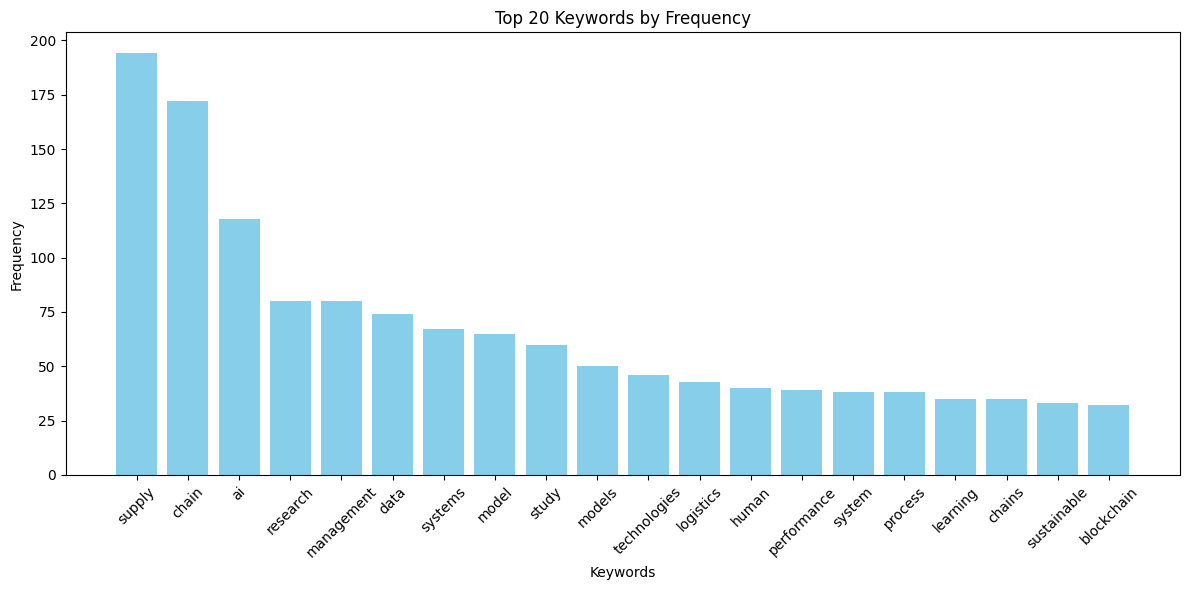

In [19]:
# Plotting Bar Chart of Top Keywords
plt.figure(figsize=(12, 6))
plt.bar(top_keywords['keyword'], top_keywords['frequency'], color='skyblue')
plt.xlabel('Keywords')
plt.ylabel('Frequency')
plt.title('Top 20 Keywords by Frequency')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

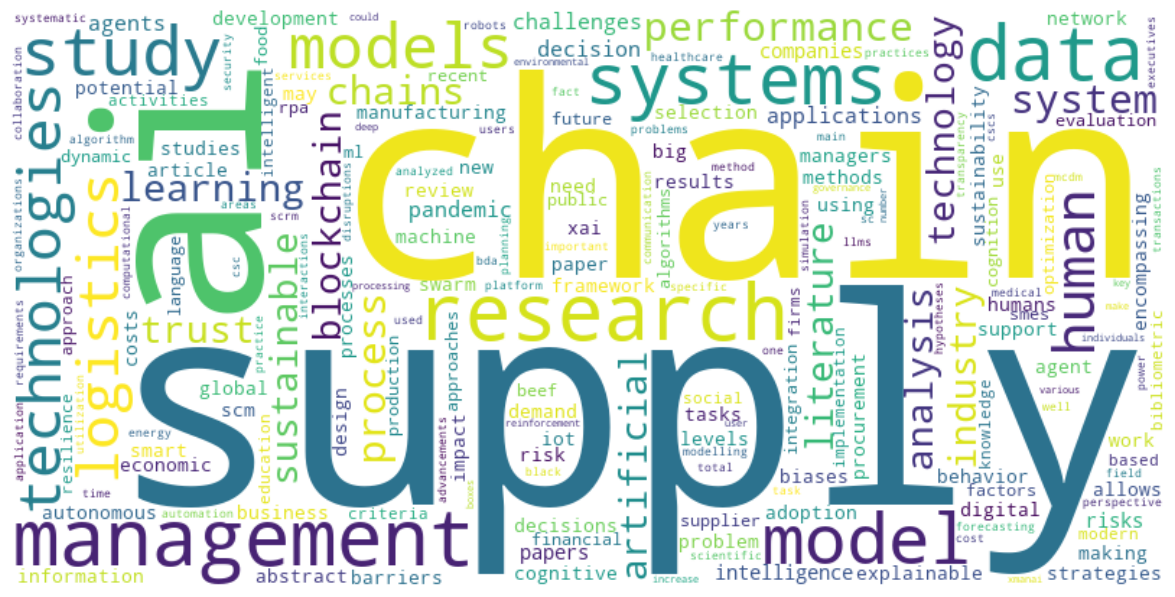

In [20]:
# Generate Word Cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(keyword_counts)

# Display the Word Cloud
plt.figure(figsize=(15, 7.5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

---

### 4. Infographics Generation

#### 4.1 Keyword Co-occurance distribution

Analyze how keywords co-occur within publications to reveal relationships between them.

In [26]:
!pip install networkx scipy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.1/23.1 MB 8.1 MB/s eta 0:00:0000:0100:01


In [28]:
# Import required libraries
import pandas as pd
import networkx as nx
from itertools import combinations
import matplotlib.pyplot as plt
from collections import Counter
from tqdm import tqdm

Build a network graph where nodes represent keywords and edges represent co-occurrence frequency.

Top 60 Keywords by Frequency:
          Keyword  Frequency
0          supply        194
1           chain        172
2              ai        118
3      management         80
4        research         80
5            data         74
6         systems         67
7           model         65
8           study         60
9          models         50
10   technologies         46
11      logistics         43
12          human         40
13    performance         39
14        process         38
15         system         38
16         chains         35
17       learning         35
18    sustainable         33
19     literature         32
20     technology         32
21     blockchain         32
22       industry         31
23          trust         31
24     artificial         30
25       analysis         30
26   applications         29
27     challenges         28
28       decision         28
29         agents         28
30       pandemic         27
31         papers         25
32          r

Building Co-occurrence Network: 100%|██████████| 593/593 [00:00<00:00, 208066.11it/s]


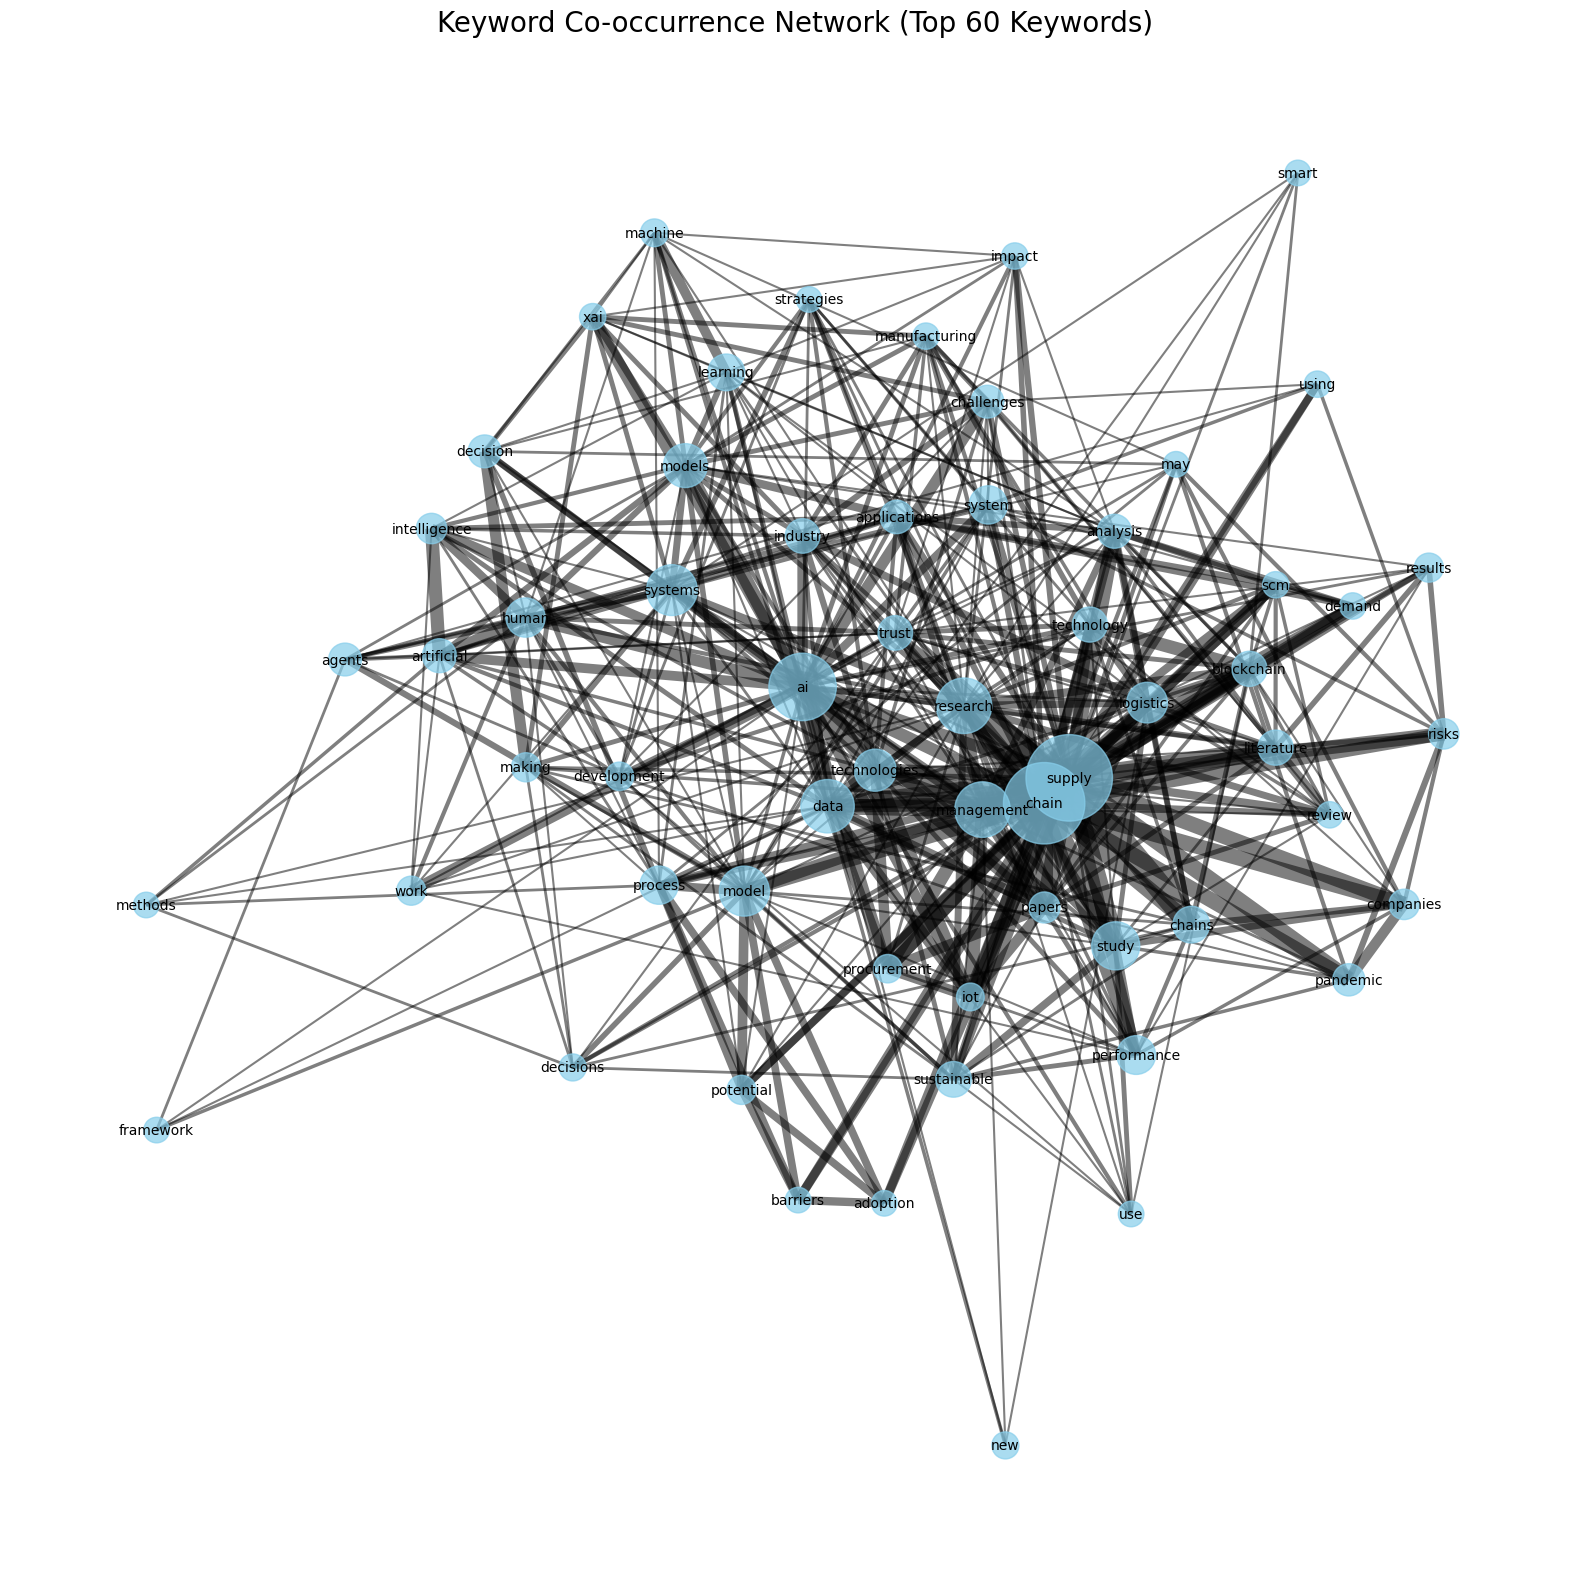

In [29]:
# Assuming references_keywords_df is already loaded
# If not, load it using pd.read_json or other relevant methods
# references_keywords_df = pd.read_json('path_to_your_references_with_keywords_gemini.json', orient='records', lines=True)

# 1. Calculate Keyword Frequencies and Identify Top 60 Keywords

# Flatten the list of all keywords
all_keywords = [keyword for keywords_list in references_keywords_df['extracted_keywords'] for keyword in keywords_list]

# Count the frequency of each keyword
keyword_counts = Counter(all_keywords)

# Get the top 60 most common keywords
top_60_keywords = [keyword for keyword, count in keyword_counts.most_common(60)]

# Display the top 60 keywords
top_60_df = pd.DataFrame(keyword_counts.most_common(60), columns=['Keyword', 'Frequency'])
print("Top 60 Keywords by Frequency:")
print(top_60_df)

# 2. Build the Co-occurrence Network with Top 60 Keywords

# Create an empty graph
G = nx.Graph()

# Iterate through each list of extracted keywords
for keywords_list in tqdm(references_keywords_df['extracted_keywords'], desc='Building Co-occurrence Network'):
    # Keep only the top 60 keywords in the current publication
    filtered_keywords = set(keywords_list).intersection(top_60_keywords)
    
    # Add edges between all unique pairs of filtered keywords
    for kw1, kw2 in combinations(filtered_keywords, 2):
        if G.has_edge(kw1, kw2):
            G[kw1][kw2]['weight'] += 1
        else:
            G.add_edge(kw1, kw2, weight=1)

# 3. Filter Edges by Weight (Optional)

# Define a threshold for minimum co-occurrence
threshold = 3

# Identify edges with weight less than the threshold
edges_to_remove = [(u, v) for u, v, attr in G.edges(data=True) if attr['weight'] < threshold]

# Remove the identified edges
G.remove_edges_from(edges_to_remove)

# 4. Draw the Network Graph

plt.figure(figsize=(16, 16))  # Increased figure size for better readability
pos = nx.spring_layout(G, k=0.15, iterations=50)  # Adjusted layout parameters for better spacing

# Draw nodes with sizes proportional to their frequencies
node_sizes = [keyword_counts[node] * 20 for node in G.nodes()]
nx.draw_networkx_nodes(G, pos, node_size=node_sizes, node_color='skyblue', alpha=0.7)

# Draw edges with widths proportional to their weights
edge_weights = [G[u][v]['weight'] for u, v in G.edges()]
nx.draw_networkx_edges(G, pos, width=[weight * 0.5 for weight in edge_weights], alpha=0.5)

# Draw labels
nx.draw_networkx_labels(G, pos, font_size=10, font_family='sans-serif')

plt.title('Keyword Co-occurrence Network (Top 60 Keywords)', fontsize=20)
plt.axis('off')  # Hide the axes
plt.tight_layout()
plt.show()

#### 4.2 Heatmap of Keyword Co-occurance

We'll calculate and draw co-occurance matrix for 20 most frequent keywords only to make it readable.

In [37]:
# Install necessary packages (if not already installed)
!pip install seaborn matplotlib tqdm

# Import required libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from itertools import combinations
from collections import Counter
from tqdm import tqdm
import numpy as np

In [38]:
# Assuming references_keywords_df and top_60_keywords are already loaded
# If not, load them using appropriate methods
# Example:
# references_keywords_df = pd.read_json('tsi-sota-ai/data/references_with_keywords_gemini.json', orient='records', lines=True)

# 1. Calculate Keyword Frequencies and Identify Top 60 Keywords

# Flatten the list of all keywords
all_keywords = [keyword for keywords_list in references_keywords_df['extracted_keywords'] for keyword in keywords_list]

# Count the frequency of each keyword
keyword_counts = Counter(all_keywords)

# Get the top 60 most common keywords
top_60_keywords = [keyword for keyword, count in keyword_counts.most_common(60)]

# Display the top 60 keywords
top_60_df = pd.DataFrame(keyword_counts.most_common(60), columns=['Keyword', 'Frequency'])
print("Top 60 Keywords by Frequency:")
print(top_60_df)

Top 60 Keywords by Frequency:
          Keyword  Frequency
0          supply        194
1           chain        172
2              ai        118
3      management         80
4        research         80
5            data         74
6         systems         67
7           model         65
8           study         60
9          models         50
10   technologies         46
11      logistics         43
12          human         40
13    performance         39
14        process         38
15         system         38
16         chains         35
17       learning         35
18    sustainable         33
19     literature         32
20     technology         32
21     blockchain         32
22       industry         31
23          trust         31
24     artificial         30
25       analysis         30
26   applications         29
27     challenges         28
28       decision         28
29         agents         28
30       pandemic         27
31         papers         25
32          r

In [39]:
# 2. Limit to Top 20 Keywords for Visualization

# Select the top 20 keywords from the top 60
top_20_keywords = top_60_keywords[:20]

# Display the top 20 keywords
top_20_df = pd.DataFrame(keyword_counts.most_common(20), columns=['Keyword', 'Frequency'])
print("\nTop 20 Keywords by Frequency:")
print(top_20_df)


Top 20 Keywords by Frequency:
         Keyword  Frequency
0         supply        194
1          chain        172
2             ai        118
3     management         80
4       research         80
5           data         74
6        systems         67
7          model         65
8          study         60
9         models         50
10  technologies         46
11     logistics         43
12         human         40
13   performance         39
14       process         38
15        system         38
16        chains         35
17      learning         35
18   sustainable         33
19    literature         32


In [40]:
# 3. Build the Co-occurrence Matrix with Top 20 Keywords

# Initialize co-occurrence matrix with top 20 keywords as both rows and columns
cooccurrence_matrix = pd.DataFrame(0, index=top_20_keywords, columns=top_20_keywords)

# Iterate through each list of extracted keywords to fill the co-occurrence matrix
for keywords_list in tqdm(references_keywords_df['extracted_keywords'], desc='Building Co-occurrence Matrix'):
    # Keep only the top 20 keywords in the current publication
    filtered_keywords = set(keywords_list).intersection(top_20_keywords)
    
    # Add co-occurrence counts for each unique pair of keywords
    for kw1, kw2 in combinations(filtered_keywords, 2):
        cooccurrence_matrix.at[kw1, kw2] += 1
        cooccurrence_matrix.at[kw2, kw1] += 1  # Ensure the matrix is symmetric


Building Co-occurrence Matrix: 100%|██████████| 593/593 [00:00<00:00, 10754.07it/s]


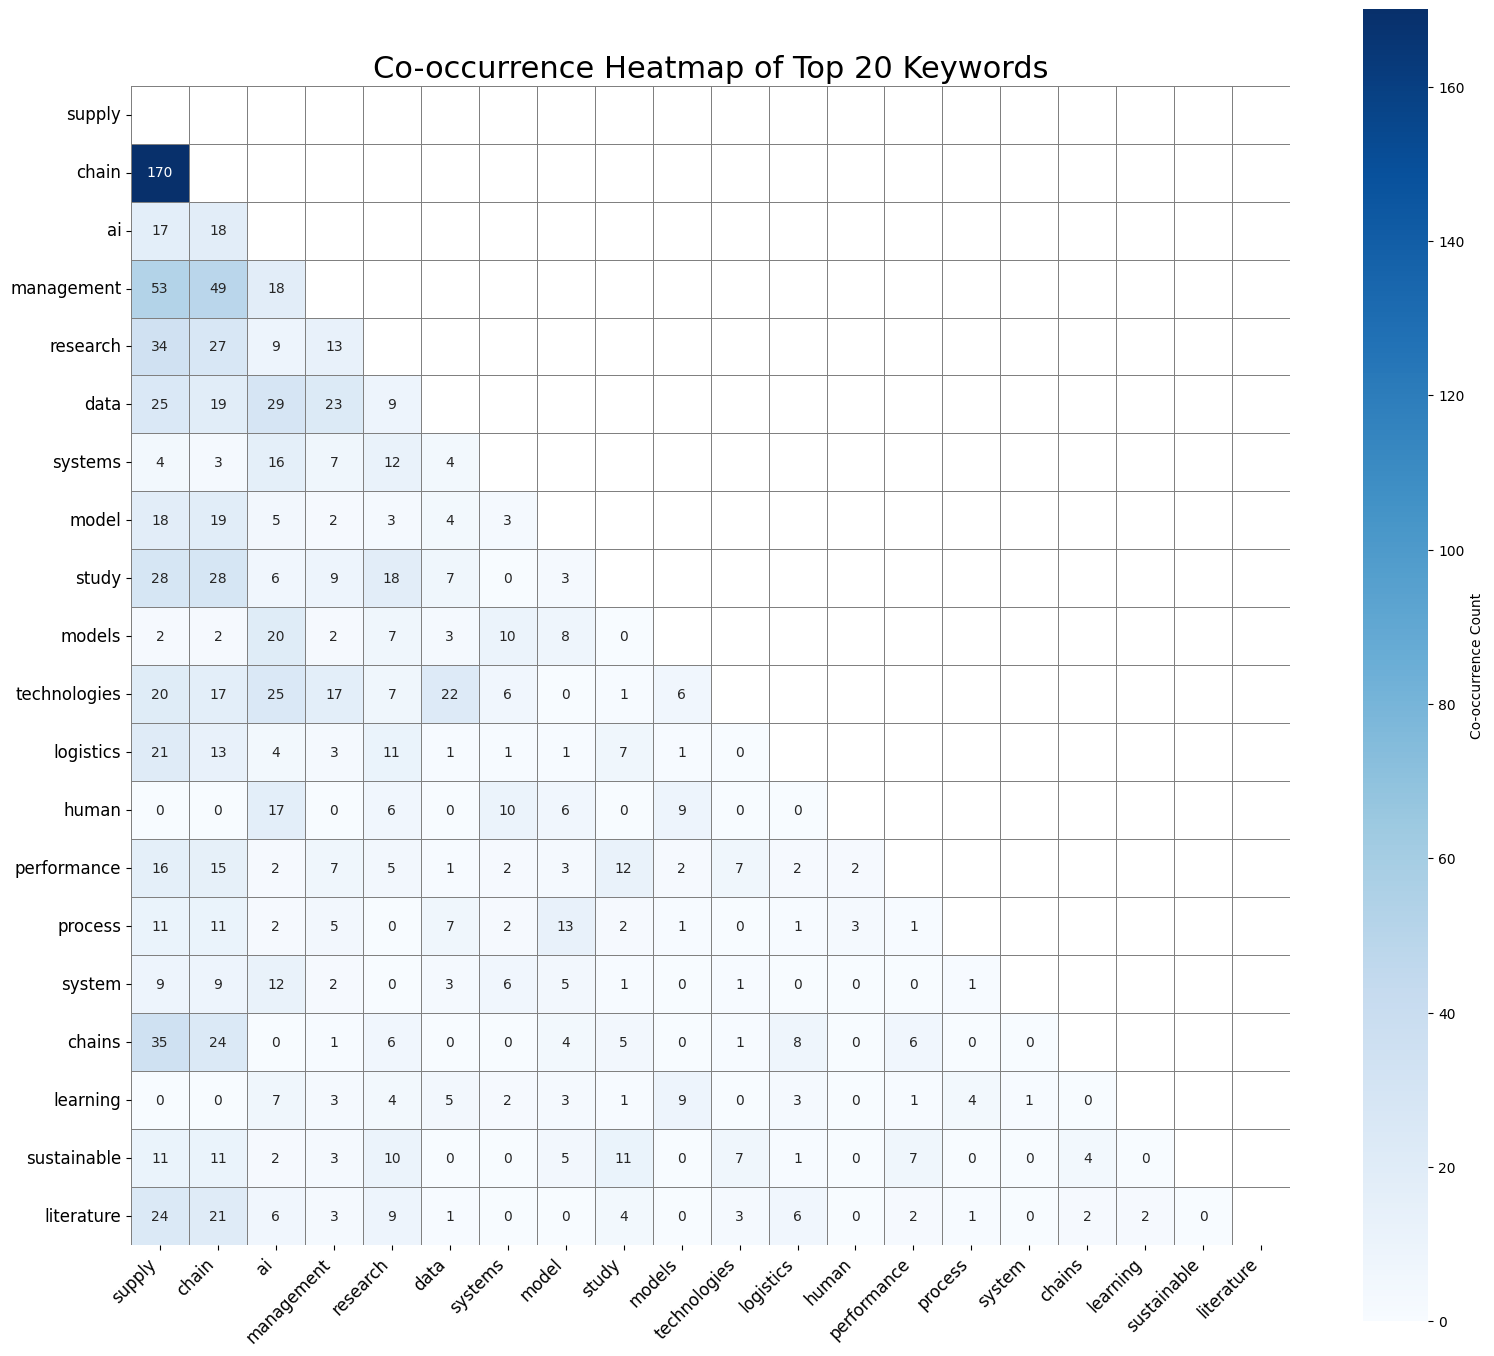

In [41]:
# 4. Create a Mask to Display Only Half the Matrix (since it's symmetric)
mask = np.triu(np.ones_like(cooccurrence_matrix, dtype=bool))

# 5. Set Up the Matplotlib Figure
plt.figure(figsize=(16, 14))  # Increased figure size for better readability

# 6. Generate the Heatmap
sns.heatmap(
    cooccurrence_matrix,
    annot=True,                  # Show counts in each cell
    fmt='d',                     # Integer format for annotations
    cmap='Blues',                # Color palette
    mask=mask,                   # Apply the mask
    linewidths=0.5,              # Lines between cells
    linecolor='gray',            # Color of the lines
    cbar_kws={'label': 'Co-occurrence Count'},  # Color bar label
    square=True                  # Make cells square-shaped
)

# 7. Customize the Plot
plt.title('Co-occurrence Heatmap of Top 20 Keywords', fontsize=22)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(rotation=0, fontsize=12)
plt.tight_layout()

# 8. Display the Heatmap
plt.show()


---
## Report

Based on the keyword analysis performed on the research publications, we can draw several conclusions about the prevalent topics and their interrelationships within the collected dataset.

### **1. Identification of Core Research Themes**

- **Top Keywords**: By extracting keywords from the abstracts and titles, and focusing on the top 20 most frequent keywords, we have identified the primary themes that are most prevalent in the research publications.
- **Representation of Field**: These top keywords likely represent the essential topics, methodologies, and areas of interest within the field of study.

### **2. Insights from the Co-occurrence Heatmap**

- **Keyword Relationships**: The co-occurrence heatmap visually displays how often pairs of top keywords appear together in the same publications.
- **Thematic Clusters**: High co-occurrence counts between specific keywords indicate strong relationships, suggesting that these topics are frequently explored together. This can reveal thematic clusters or subfields within the broader research area.
- **Research Trends**: Patterns observed in the heatmap may highlight current research trends, popular combinations of topics, and potential areas of interdisciplinary collaboration.

### **3. Understanding the Research Landscape**

- **Dominant Topics**: Keywords with the highest frequencies and co-occurrences are likely central to the field, indicating dominant research areas that receive significant attention.
- **Emerging Areas**: Keywords that appear with moderate frequency but have increasing co-occurrence with other top keywords might represent emerging topics or growing interest in certain research directions.
- **Interdisciplinary Connections**: The co-occurrence of keywords from different domains may point to interdisciplinary research and opportunities for cross-collaboration between fields.

### **4. Potential Gaps and Opportunities**

- **Underexplored Connections**: Low co-occurrence counts between certain keywords may suggest underexplored or niche areas that could benefit from further research.
- **Focus for Future Research**: Identifying keywords with potential but fewer associations may help in strategizing future research efforts to fill gaps in the literature.

### **5. Methodological Efficacy**

- **Effectiveness of Visualization**: By limiting the heatmap to the top 20 keywords, the visualization remains clear and readable, effectively conveying essential information without overwhelming complexity.
- **Data Handling**: The approach demonstrates efficient data processing and visualization techniques, handling the keyword extraction, frequency calculation, and co-occurrence analysis systematically.
- **Scalability**: The methodology can be scaled or adapted for larger datasets or different sets of keywords, making it a versatile tool for bibliometric analysis.

### **Conclusion**

The keyword analysis has successfully distilled a large collection of research publications into a coherent overview of the most significant topics and their interrelationships. The co-occurrence heatmap serves as a powerful visual tool that reveals:

- **Key Research Areas**: Highlighting the predominant themes within the field.
- **Topic Interconnectivity**: Showing how different research topics are linked through co-occurrence, indicating collaboration or interdisciplinary research potential.
- **Research Focus Dynamics**: Providing insights into which topics are central and how they associate with others, aiding in understanding the dynamics of the research landscape.

This analysis not only offers a snapshot of current research emphases but also aids in identifying trends, potential gaps, and opportunities for future exploration. It serves as a valuable reference for researchers, policymakers, and stakeholders interested in the thematic development and direction of the field.

By applying these insights, stakeholders can:

- **Strategize Research Directions**: Focus on emerging areas or strengthen connections between topics.
- **Encourage Collaboration**: Identify opportunities for interdisciplinary work based on keyword relationships.
- **Inform Decision-Making**: Use the analysis to guide funding allocation, resource distribution, and policy formulation within the research community.

Overall, the keyword analysis contributes significantly to our understanding of the research landscape, providing both a macro and micro perspective on the topics that define and drive the field.